# Kernel Methods

## First Problem: 1D Non-Linear Regression

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model
import sklearn.kernel_ridge
import sklearn.metrics.pairwise
from matplotlib.colors import ListedColormap
import pickle
import warnings

warnings.filterwarnings("ignore")

np.random.seed(34985)

reglambda = 0.1
Ntrain = 20
Ntest = 5

In [39]:
def Kernel_matrix(kfunc,X):
    N, _ = X.shape
    K = np.empty((N,N))
    for i in range(N):
        for j in range(N):
            K[i,j] = kfunc(X[i,:],X[j,:])
    return K

In [40]:
def sample_data(N):
    X = 2*np.pi*np.random.rand(N)
    Y = np.cos(X) + 0.1*np.random.randn(N)
    return {'X':X.reshape(-1,1),'Y':Y}, pd.DataFrame({'X':X,'Y':Y})

In [41]:
def evaluate_scikitlearn_kernel_model(model,kernelfunc,trainX,testX):
    testK  = kernelfunc(trainX, testX)
    return model.predict(testK.T)

In [42]:
def evaluate_kernel_model(model,kfunc,trainX,testX):
    
    N, _ = trainX.shape
    
    K = np.empty((1,N))
    for i in range(N):
        K[0,i] = kfunc(trainX[i,:],testX)
            
    return model.predict(K)

In [43]:
def plot_model(model, train):
    
    xmin = 0.9*train['X'].min()
    xmax = 1.1*train['X'].max()
    
    xline = np.linspace(xmin,xmax).reshape(-1,1)
    yline = model.predict(xline)
    
    plt.figure(figsize=(10,6))
    plt.plot(xline,yline,'k',linewidth=2)
    plt.scatter(train['X'], train['Y'], label='train')
    plt.xlabel('x',fontsize=20)
    plt.ylabel('y',fontsize=20)
    plt.grid(linestyle='--')   
    plt.ylim((-1.3,1.3))

def plot_scikitlearn_kernel_model(model, kfunc, train):
    
    xmin = 0.9*train['X'].min()
    xmax = 1.1*train['X'].max()
    
    xline = np.linspace(xmin,xmax).reshape(-1,1)
    yline = evaluate_scikitlearn_kernel_model(model,kfunc,train['X'],xline)
    
    plt.figure(figsize=(10,6))
    plt.plot(xline,yline,'k',linewidth=2)
    plt.scatter(train['X'], train['Y'], label='train')
    plt.xlabel('x',fontsize=20)
    plt.ylabel('y',fontsize=20)
    plt.grid(linestyle='--')  
    plt.ylim((-1.3,1.3))
    
def plot_kernel_model(model, kfunc, train):
    
    xmin = 0.9*train['X'].min()
    xmax = 1.1*train['X'].max()
    
    xline = np.linspace(xmin,xmax).reshape(-1,1)
    
    yline = [ evaluate_kernel_model(model,kfunc,train['X'],x) for x in xline]
    
    plt.figure(figsize=(10,6))
    plt.plot(xline,yline,'k',linewidth=2)
    plt.scatter(train['X'], train['Y'], label='train')

    plt.xlabel('x',fontsize=20)
    plt.ylabel('y',fontsize=20)
    plt.grid(linestyle='--')  
    plt.ylim((-1.3,1.3))
    

(-1.3, 1.3)

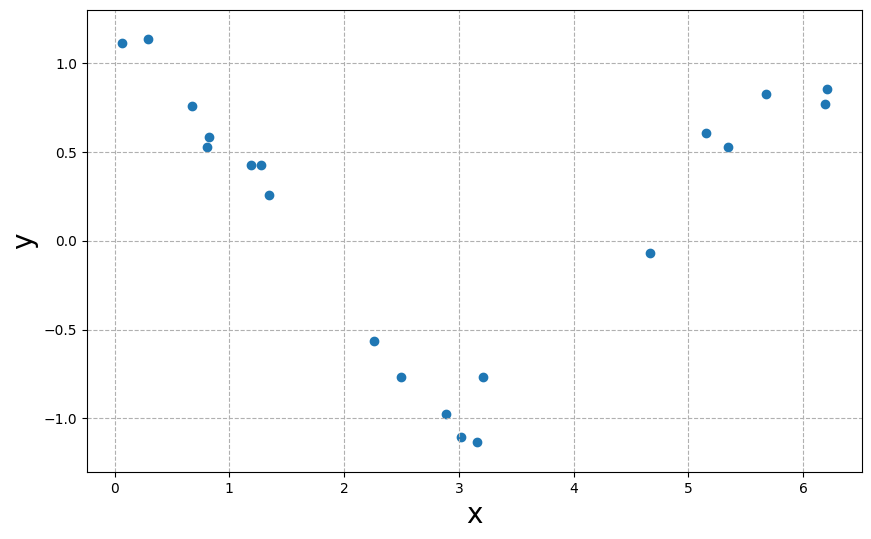

In [44]:
train, dftrain = sample_data(Ntrain)
test,dftest  = sample_data(Ntest)

with open("linreg_data.pickle", "wb") as output_file:
    pickle.dump({'train':train,'test':test}, output_file)

# Plot the training data
plt.figure(figsize=(10,6))
plt.scatter(train['X'], train['Y'], label='train')
# plt.scatter(test['X'], test['Y'], label='test')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.grid(linestyle='--')
plt.ylim((-1.3,1.3))

In [45]:
dftrain

,X,Y
0,1.191460,0.424676
1,0.802119,0.526519
2,2.261024,-0.566936
3,0.823273,0.585896
4,0.678048,0.759316
5,3.211828,-0.768998
6,5.156901,0.603700
7,6.190665,0.770687
8,5.341439,0.526088
9,0.289061,1.133502


## Standard Linear Regression

In [46]:
linreg = sklearn.linear_model.LinearRegression()
linreg.fit(train['X'], train['Y'])

LinearRegression()

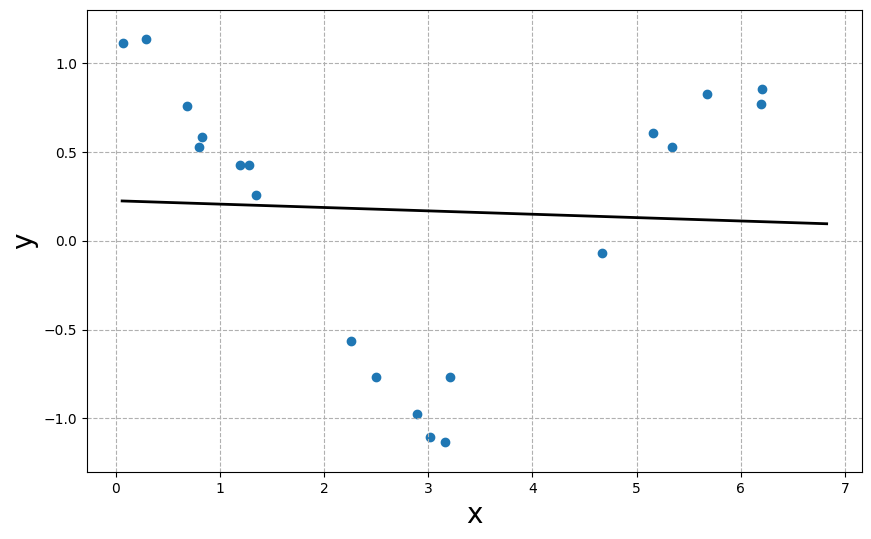

In [47]:
plot_model(linreg, train)

## Linear kernel

In [48]:
N = Ntrain

In [49]:
def linear_kernel_function(x, z):
    return np.dot(x, z)

In [50]:
# compute the kernel matrix
KernelMatrix = Kernel_matrix(linear_kernel_function, train['X']) + 0.1*np.eye(N)

# train linear regression
linreg_linkern = sklearn.linear_model.LinearRegression()
linreg_linkern.fit(KernelMatrix, train['Y'])

LinearRegression()

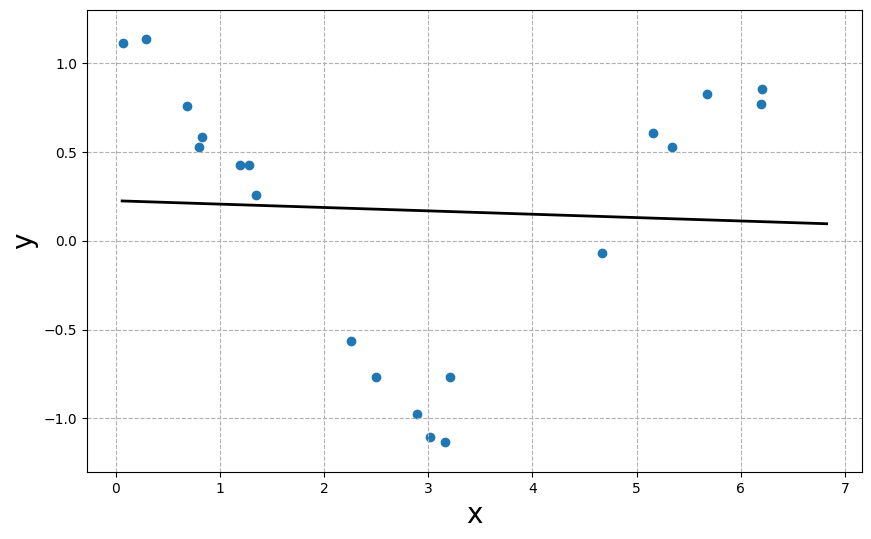

In [51]:
# plot
plot_kernel_model(linreg_linkern, linear_kernel_function, train)

In [52]:
dfKtrain = pd.DataFrame(KernelMatrix)
dfKtrain['Y'] = train['Y']
dfKtrain

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Y
0,1.519576,0.955692,2.693918,0.980897,0.807866,3.826763,6.144239,7.375927,6.364108,0.344404,...,3.440296,0.079128,3.599265,6.762375,5.561869,1.525632,3.763659,7.392711,2.975117,0.424676
1,0.955692,0.743395,1.813610,0.660363,0.543875,2.576268,4.136449,4.965650,4.284469,0.231861,...,2.316089,0.053271,2.423111,4.552592,3.744383,1.027092,2.533785,4.976949,2.002920,0.526519
2,2.693918,1.813610,5.212228,1.861440,1.533082,7.262020,11.659876,13.997240,12.077119,0.653573,...,6.528624,0.150161,6.830299,12.832907,10.554716,2.895180,7.142267,14.029091,5.645856,-0.566936
3,0.980897,0.660363,1.861440,0.777779,0.558219,2.644212,4.245539,5.096609,4.397463,0.237976,...,2.377171,0.054676,2.487016,4.672657,3.843133,1.054179,2.600608,5.108206,2.055742,0.585896
4,0.807866,0.543875,1.533082,0.558219,0.559749,2.177773,3.496625,4.197567,3.621750,0.195997,...,1.957838,0.045031,2.048306,3.848400,3.165204,0.868222,2.141861,4.207118,1.693109,0.759316
5,3.826763,2.576268,7.262020,2.644212,2.177773,10.415841,16.563082,19.883354,17.155784,0.928413,...,9.274038,0.213306,9.702573,18.229395,14.993181,4.112660,10.145730,19.928598,8.020049,-0.768998
6,6.144239,4.136449,11.659876,4.245539,3.496625,16.563082,26.693632,31.924650,27.545273,1.490657,...,14.890366,0.342483,15.578420,29.269060,24.073004,6.603273,16.289952,31.997294,12.876965,0.603700
7,7.375927,4.965650,13.997240,5.096609,4.197567,19.883354,31.924650,38.424335,33.067058,1.789477,...,17.875321,0.411138,18.701304,35.136399,28.898731,7.926980,19.555471,38.411542,15.458310,0.770687
8,6.364108,4.284469,12.077119,4.397463,3.621750,17.155784,27.545273,33.067058,28.630967,1.544000,...,15.423210,0.354739,16.135886,30.316439,24.934445,6.839568,16.872880,33.142302,13.337761,0.526088
9,0.344404,0.231861,0.653573,0.237976,0.195997,0.928413,1.490657,1.789477,1.544000,0.183556,...,0.834652,0.019197,0.873220,1.640623,1.349368,0.370134,0.913103,1.793549,0.721795,1.133502


## Quadratic kernel

In [53]:
def quadratic_kernel_function(x, z):
    return (np.dot(x, z) + 1)**2

# compute the kernel matrix
KernelMatrix = Kernel_matrix(quadratic_kernel_function, train['X']) + 0.1*np.eye(N)

# train linear regression
linreg_quadkern = sklearn.linear_model.LinearRegression()
linreg_quadkern.fit(KernelMatrix, train['Y'])

LinearRegression()

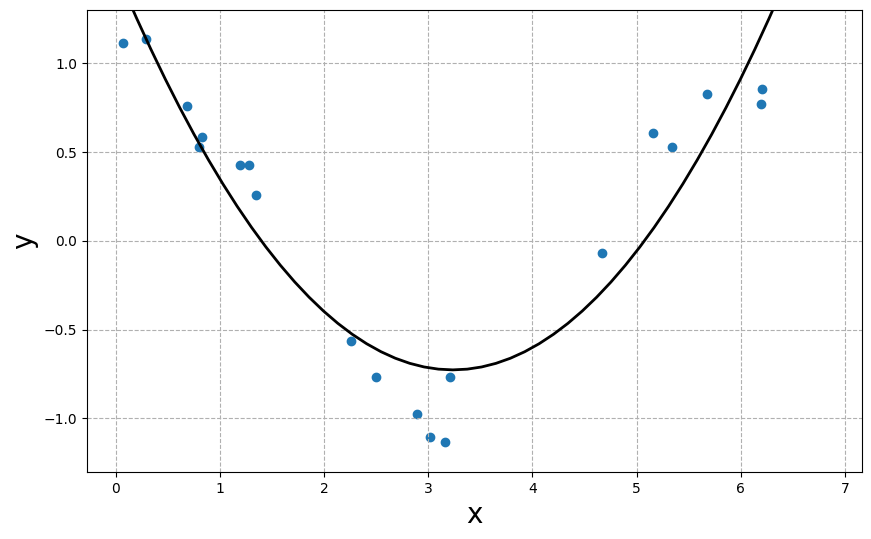

In [54]:
# plot
plot_kernel_model(linreg_quadkern, quadratic_kernel_function, train)

In [55]:
def poly3_kernel_function(x1, x2):
    return (np.dot(x1, x2) + 1)**3

# compute the kernel matrix
KernelMatrix = Kernel_matrix(poly3_kernel_function, train['X']) + 0.1*np.eye(N)


# train linear regression
linreg_polykern = sklearn.linear_model.LinearRegression()
linreg_polykern.fit(KernelMatrix, train['Y'])

LinearRegression()

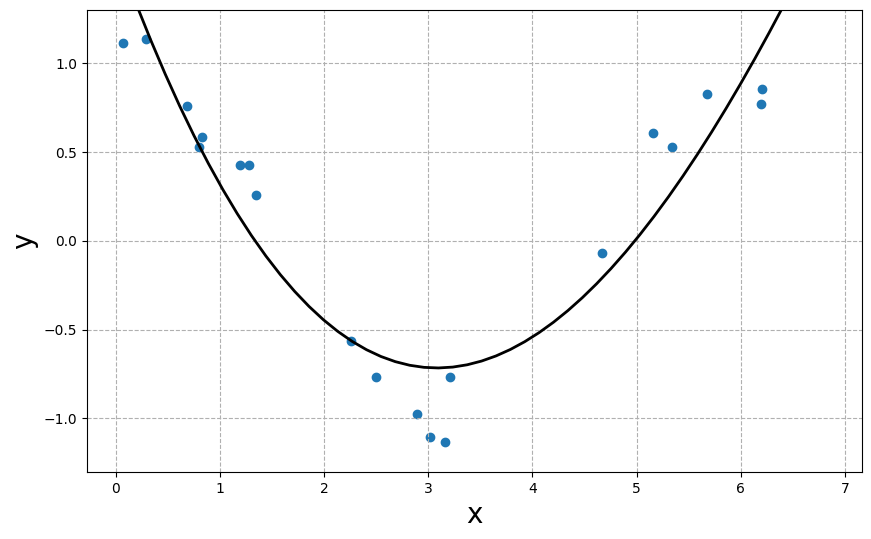

In [56]:


# plot
plot_kernel_model(linreg_polykern, poly3_kernel_function, train)

In [57]:
def poly10_kernel_function(x1, x2):
    return (np.dot(x1, x2) + 1)**10

# compute the kernel matrix
KernelMatrix1 = (Kernel_matrix(poly10_kernel_function, train['X']) + 0.1*np.eye(N))

In [58]:
# train linear regression
linreg_polykern = sklearn.linear_model.LinearRegression()
linreg_polykern.fit(KernelMatrix1, train['Y'])

LinearRegression()

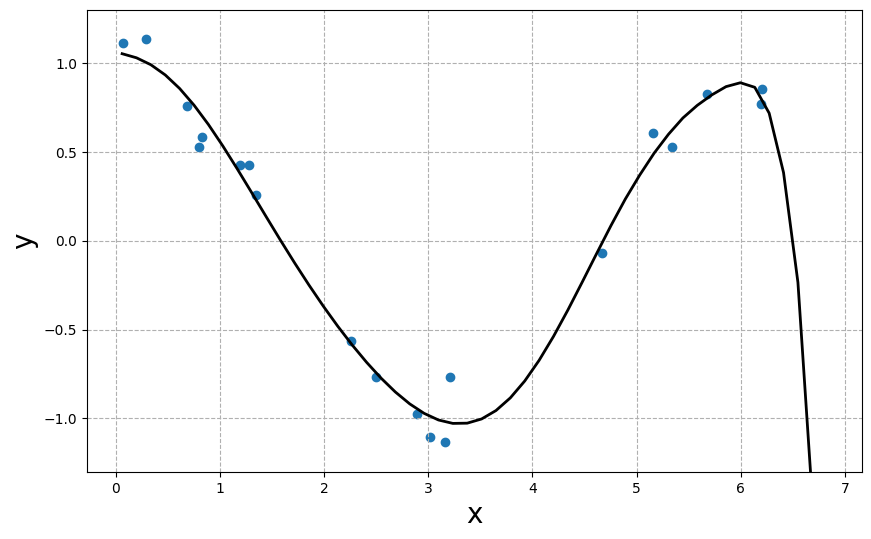

In [59]:
# plot
plot_kernel_model(linreg_polykern, poly10_kernel_function, train)

In [60]:
# compute the kernel matrix
Ktrain = sklearn.metrics.pairwise.polynomial_kernel(train['X'], train['X'], degree=4) + 0.1*np.eye(Ntrain)

# train linear regression
linreg_polykern = sklearn.linear_model.LinearRegression()
linreg_polykern.fit(Ktrain, train['Y'])

LinearRegression()

(-1.4, 1.4)

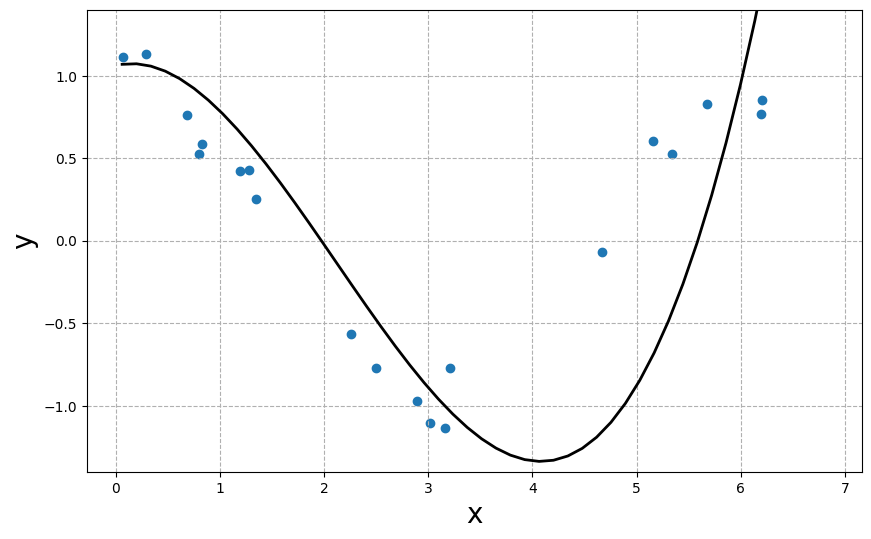

In [61]:
plot_scikitlearn_kernel_model(linreg_polykern, sklearn.metrics.pairwise.polynomial_kernel, train)
plt.ylim((-1.4,1.4))

## Gaussian Kernel

In [62]:
# compute the kernel matrix
Ktrain = sklearn.metrics.pairwise.rbf_kernel(train['X'], train['X']) + 0.1*np.eye(Ntrain)

# train linear regression
linreg_gausskern = sklearn.linear_model.LinearRegression()
linreg_gausskern.fit(Ktrain, train['Y'])

LinearRegression()

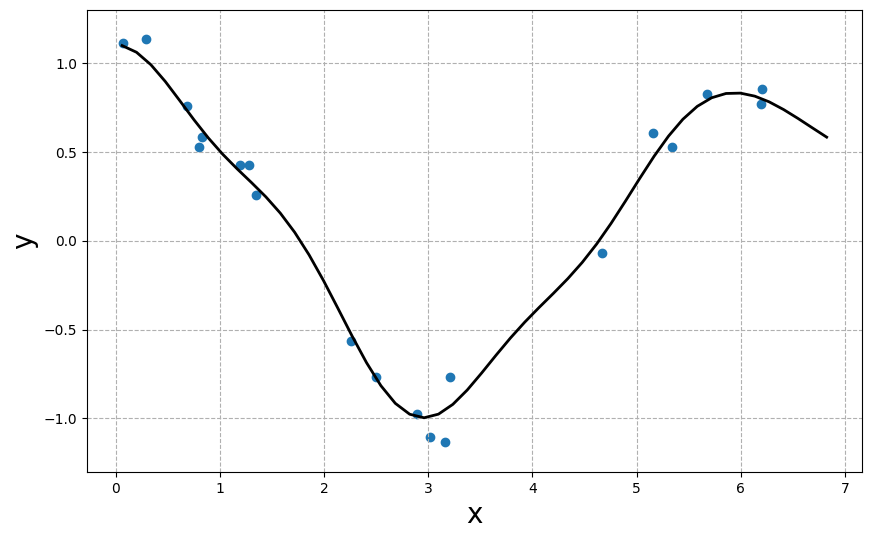

In [63]:
# plot
plot_scikitlearn_kernel_model(linreg_gausskern, sklearn.metrics.pairwise.rbf_kernel, train)

In [64]:
sklearn.metrics.pairwise.PAIRWISE_KERNEL_FUNCTIONS

{'additive_chi2': <function sklearn.metrics.pairwise.additive_chi2_kernel(X, Y=None)>,
 'chi2': <function sklearn.metrics.pairwise.chi2_kernel(X, Y=None, gamma=1.0)>,
 'linear': <function sklearn.metrics.pairwise.linear_kernel(X, Y=None, dense_output=True)>,
 'polynomial': <function sklearn.metrics.pairwise.polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)>,
 'poly': <function sklearn.metrics.pairwise.polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)>,
 'rbf': <function sklearn.metrics.pairwise.rbf_kernel(X, Y=None, gamma=None)>,
 'laplacian': <function sklearn.metrics.pairwise.laplacian_kernel(X, Y=None, gamma=None)>,
 'sigmoid': <function sklearn.metrics.pairwise.sigmoid_kernel(X, Y=None, gamma=None, coef0=1)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)>}

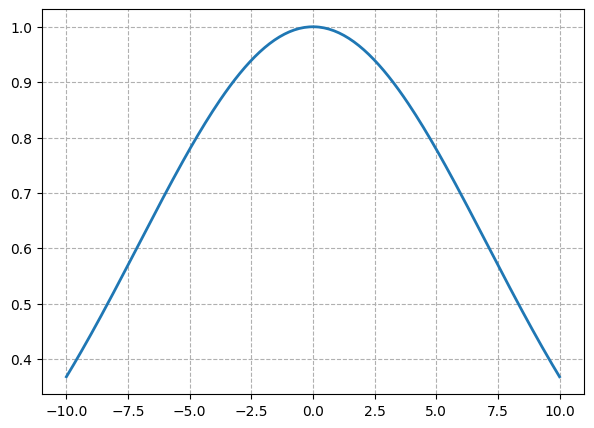

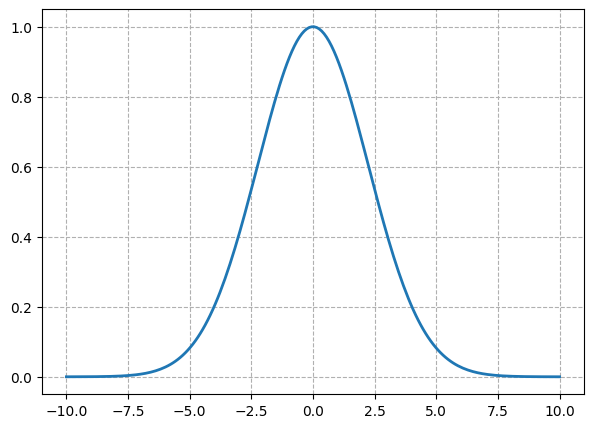

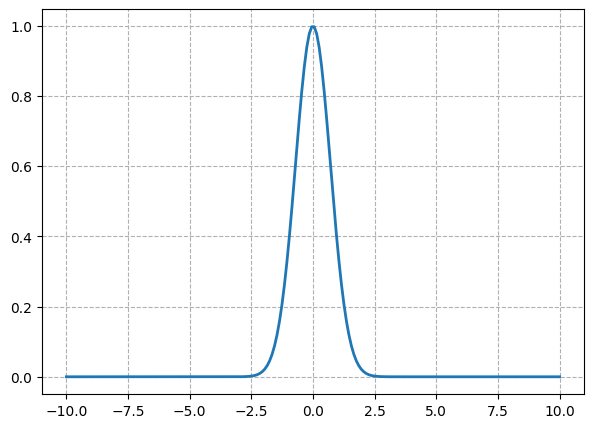

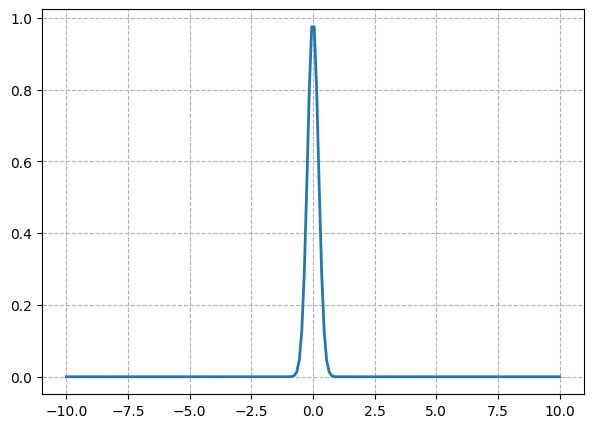

In [65]:
gamma_vals = [0.01, 0.1, 1, 10]

x    = np.linspace(-10, 10, 200).reshape(-1,1)
zero = np.array([[0]])

n_plots = len(gamma_vals)

for i in range(n_plots):
    plt.figure(figsize=(7,5))
    k = sklearn.metrics.pairwise.rbf_kernel(x, zero, gamma=gamma_vals[i])
    plt.grid(linestyle='--')
    plt.plot(x, k, linewidth=2)


# Linear Regression with Gaussian Kernel and Regularization

In [66]:
from sklearn import kernel_ridge

kernel_ridge = kernel_ridge.KernelRidge(alpha=0.1, kernel='rbf', gamma=1)
kernel_ridge.fit(train['X'], train['Y'])

KernelRidge(alpha=0.1, gamma=1, kernel='rbf')

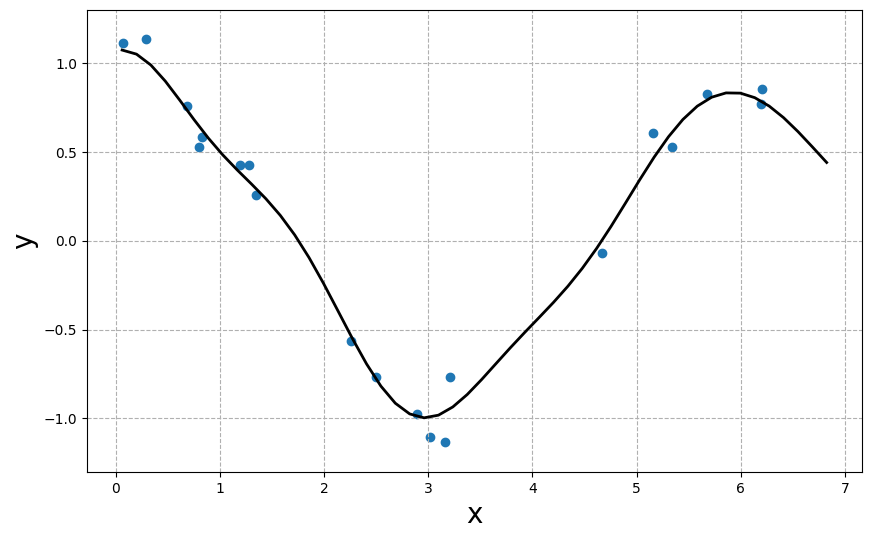

In [67]:
plot_model(kernel_ridge, train)

# Second Problem: 2D Non-Linear Classification

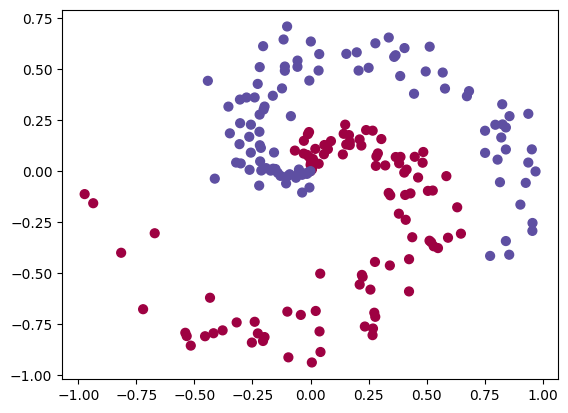

In [68]:
N = 100  # number of points per class
D = 2   # dimensionality
K = 2   # number of classes

X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K) # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.4 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

# Plotting Setup

In [69]:
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

X_test = np.c_[xx.ravel(), yy.ravel()]
labels=['or','ob']

def plot_model(X_test, clf):
    Z = clf.predict(X_test)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    
    # Plot also the training points
    #plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    for i in [0, 1]:
        plt.plot(X[y==i, 0], X[y==i, 1], labels[i])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.contourf(xx, yy, Z, alpha=1, cmap=cmap_light)
    plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

# Kernelized Logistic Regression

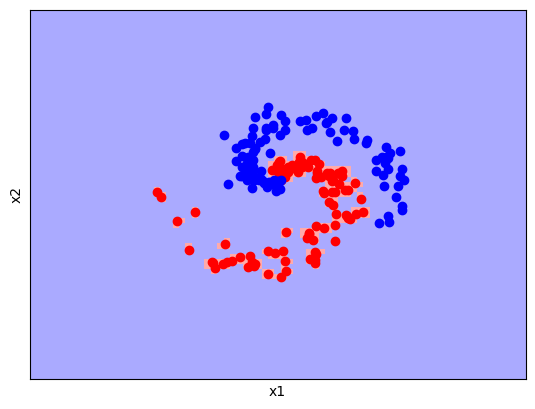

In [70]:
#gamma = 0.01
#gamma = 0.1
#gamma = 1
gamma = 10
gamma = 1000

K      = sklearn.metrics.pairwise.rbf_kernel(X, X, gamma=gamma)
K_test = sklearn.metrics.pairwise.rbf_kernel(X_test, X, gamma=gamma)

clf = sklearn.linear_model.LogisticRegression(solver='lbfgs')
clf.fit(K, y)

plot_model(K_test, clf)

# SVM Loss Function

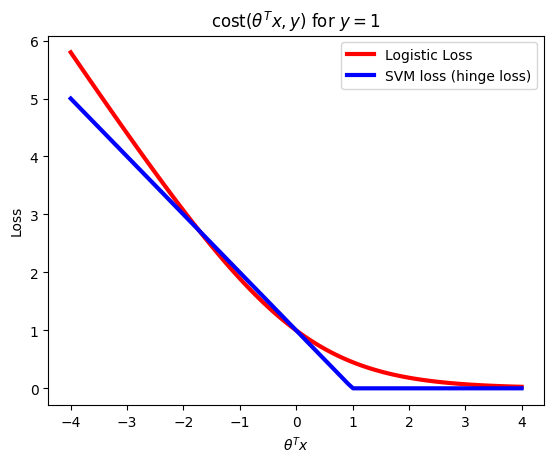

In [71]:
def plot_loss():
    xmin, xmax = -4, 4
    xx = np.linspace(xmin, xmax, 100)

    plt.figure()
    plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-',linewidth=3)
    plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'b-',linewidth=3)
    plt.xlabel(r"$\theta^T x$")
    plt.ylabel("Loss")
    plt.legend(["Logistic Loss", "SVM loss (hinge loss)"])
    plt.title(r"cost($\theta^T x, y)$ for $y = 1$")
    plt.show()
    
plot_loss()

# SVM Classification

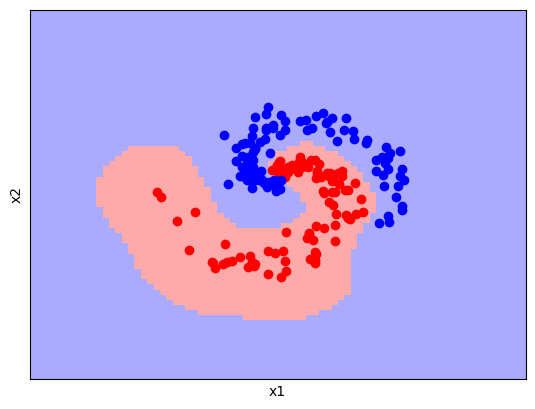

In [72]:


#gamma = 0.01
#gamma = 0.1
#gamma = 1
gamma = 10

C = 10 # C = 2/lambda

clf = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
plot_model(X_test, clf)



# SVM vs Kernelized Logistic Regression

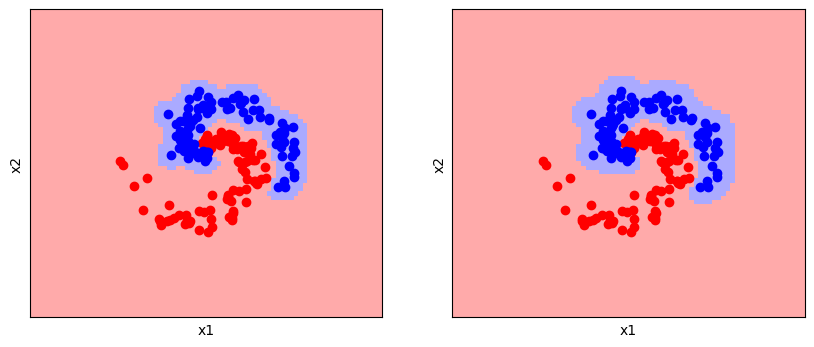

In [73]:


C = 1000
gamma = 100

# Fit kernelized logistic regression
K      = sklearn.metrics.pairwise.rbf_kernel(X, X, gamma=gamma)
K_test = sklearn.metrics.pairwise.rbf_kernel(X_test, X, gamma=gamma)
logistic = sklearn.linear_model.LogisticRegression(C=C, solver='lbfgs')
logistic.fit(K, y)

# Fit SVM with same parameter
svm = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
svm.fit(X, y)

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(K_test, logistic)

plt.subplot(122)
plot_model(X_test, svm)

